In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fd=pd.read_csv("Placement_Data_Full_Class.csv")

In [4]:
fd.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
fd.drop(['salary'],axis=1,inplace=True)

In [6]:
fd.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [7]:
fd.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


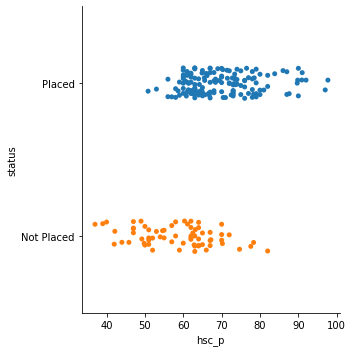

In [8]:
sns.catplot(x="hsc_p",y="status",data=fd)

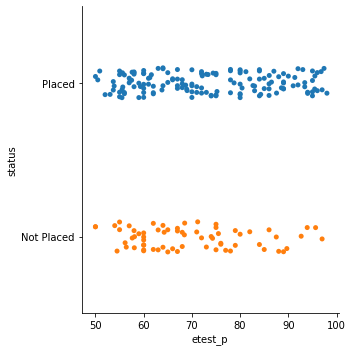

In [9]:
sns.catplot(x="etest_p",y="status",data=fd)

In [10]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
status_le = le.fit_transform(fd['status'])

s_le=pd.DataFrame(status_le,columns=['status_l'])

fd=pd.concat([fd,s_le],axis="columns")

fd.drop(['status'],axis="columns",inplace=True)

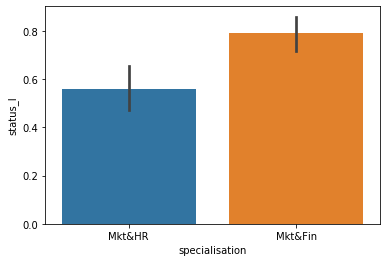

In [11]:
sns.barplot(x='specialisation',y='status_l',data=fd)

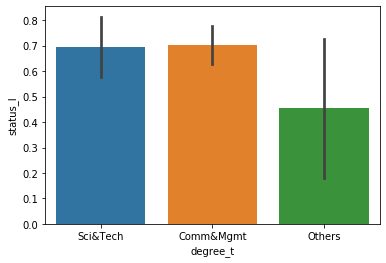

In [12]:
sns.barplot(x='degree_t',y='status_l',data=fd)

In [13]:
fd=pd.get_dummies(data=fd,columns=['gender','hsc_b','hsc_s','ssc_b','degree_t','specialisation'])

In [14]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
le1 = LabelEncoder()
# Assigning numerical values and storing in another column
workex_le = le1.fit_transform(fd['workex'])

w_le=pd.DataFrame(workex_le,columns=['workex_l'])

fd=pd.concat([fd,w_le],axis="columns")

fd.drop(['workex'],axis="columns",inplace=True)

In [15]:
fd.head(5)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status_l,gender_F,gender_M,hsc_b_Central,...,hsc_s_Commerce,hsc_s_Science,ssc_b_Central,ssc_b_Others,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR,workex_l
0,1,67.00,91.00,58.00,55.0,58.80,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
1,2,79.33,78.33,77.48,86.5,66.28,1,0,1,0,...,0,1,1,0,0,0,1,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
3,4,56.00,52.00,52.00,66.0,59.43,0,0,1,1,...,0,1,1,0,0,0,1,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,1,0,1,1,...,1,0,1,0,1,0,0,1,0,0


In [16]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 22 columns):
sl_no                     215 non-null int64
ssc_p                     215 non-null float64
hsc_p                     215 non-null float64
degree_p                  215 non-null float64
etest_p                   215 non-null float64
mba_p                     215 non-null float64
status_l                  215 non-null int32
gender_F                  215 non-null uint8
gender_M                  215 non-null uint8
hsc_b_Central             215 non-null uint8
hsc_b_Others              215 non-null uint8
hsc_s_Arts                215 non-null uint8
hsc_s_Commerce            215 non-null uint8
hsc_s_Science             215 non-null uint8
ssc_b_Central             215 non-null uint8
ssc_b_Others              215 non-null uint8
degree_t_Comm&Mgmt        215 non-null uint8
degree_t_Others           215 non-null uint8
degree_t_Sci&Tech         215 non-null uint8
specialisation_Mkt&Fin    215 

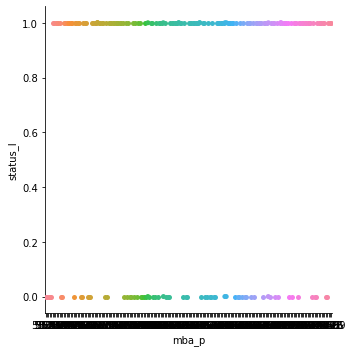

In [17]:
sns.catplot(x="mba_p",y="status_l",data=fd)

In [18]:
fd.drop(['gender_M','hsc_b_Others','ssc_b_Others','degree_t_Others'],axis=1,inplace=True)

In [19]:
fd.head(5)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status_l,gender_F,hsc_b_Central,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,ssc_b_Central,degree_t_Comm&Mgmt,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR,workex_l
0,1,67.00,91.00,58.00,55.0,58.80,1,0,0,0,1,0,0,0,1,0,1,0
1,2,79.33,78.33,77.48,86.5,66.28,1,0,0,0,0,1,1,0,1,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,1,0,1,1,0,0,1,1,0,1,0,0
3,4,56.00,52.00,52.00,66.0,59.43,0,0,1,0,0,1,1,0,1,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,1,0,1,0,1,0,1,1,0,1,0,0


In [20]:
y=fd['status_l']
x=fd.drop(['status_l'],axis=1)

In [21]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: status_l, dtype: int32

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [23]:
from sklearn.linear_model import LogisticRegression 
obj=LogisticRegression()
obj.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
obj.score(X_test,y_test)

0.7272727272727273

In [25]:
obj.score(X_train,y_train)

0.9120879120879121

In [26]:
result=obj.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,result))

[[ 5  6]
 [ 3 19]]


In [28]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.76      0.86      0.81        22

    accuracy                           0.73        33
   macro avg       0.69      0.66      0.67        33
weighted avg       0.71      0.73      0.71        33



In [29]:
from sklearn import metrics
metrics.accuracy_score(result,y_test)

0.7272727272727273

In [30]:
#applying cross validation!

from sklearn.model_selection import cross_val_score
scores=cross_val_score(obj,x,y,cv=5)
print(scores)
print(scores.mean())

[0.81818182 0.86363636 0.86046512 0.88095238 0.85714286]
0.8560757072384979


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [31]:
#without min max scaler

from sklearn.svm import SVC 
objj=SVC()
objj.fit(X_train,y_train)
objj.score(X_test,y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6666666666666666

In [32]:
objj.score(X_train,y_train)

1.0

In [33]:
#bestttttt!!!!!!

from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7272727272727273

In [34]:
model.score(X_train,y_train)

1.0

In [35]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=3)
print(scores)
print(scores.mean())

[0.83561644 0.85915493 0.78873239]
0.8278345874332754


In [36]:
from sklearn.ensemble import RandomForestRegressor 
regr= RandomForestRegressor(max_depth=2,random_state=0,n_estimators=100)
regr.fit(X_train,y_train)
regr.score(X_test,y_test)

0.3280962555463144

In [37]:
regr.score(X_train,y_train)

0.5643151844816705

In [38]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(regr,x,y,cv=3)
print(scores)
print(scores.mean())

[0.3554912  0.49272212 0.30868366]
0.38563232446775064


In [39]:
#feature selection (without min max scaler)

In [40]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [41]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(x,y)

In [42]:
dfscores=pd.DataFrame(fit.scores_)
dfcols=pd.DataFrame(x.columns)

In [43]:
featurescores=pd.concat([dfcols,dfscores],axis=1)
featurescores.columns=['specs','score']

In [44]:
featurescores.head(10)

,specs,score
0,sl_no,5.532155
1,ssc_p,137.739258
2,hsc_p,92.449312
3,degree_p,40.204896
4,etest_p,8.522679
5,mba_p,0.691857
6,gender_F,1.142736
7,hsc_b_Central,0.037612
8,hsc_s_Arts,1.047380
9,hsc_s_Commerce,0.060795


In [45]:
#feature scaling with min max scalar

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler(feature_range=(0,1)).fit(x)
X=scaling.transform(x)

In [47]:
df = pd.DataFrame(X)

In [48]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.538240,0.889621,0.195122,0.104167,0.284483,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.004673,0.792414,0.680890,0.670244,0.760417,0.564843,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,0.009346,0.497011,0.510708,0.341463,0.520833,0.247001,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.014019,0.311482,0.247117,0.048780,0.333333,0.308096,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.018692,0.925788,0.602965,0.568293,0.975000,0.160795,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
5,0.023364,0.290868,0.210873,0.420732,0.104167,0.013868,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
6,0.028037,0.105339,0.200988,0.707317,0.505833,0.077961,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.032710,0.847454,0.444811,0.390244,0.354167,0.409670,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
8,0.037383,0.661925,0.691928,0.536585,0.861250,0.377811,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
9,0.042056,0.352711,0.543657,0.268293,0.083333,0.037481,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [49]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(df,y,test_size=0.15)

In [50]:
from sklearn.linear_model import LogisticRegression 
o=LogisticRegression()
o.fit(X1_train,y1_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(o,df,y,cv=5)
print(scores)
print(scores.mean())

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.79545455 0.86363636 0.8372093  0.83333333 0.78571429]
0.823069566092822


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
bestf=SelectKBest(score_func=chi2,k=10)
fit=bestf.fit(df,y)

In [53]:
dfscores=pd.DataFrame(fit.scores_)
dfcols=pd.DataFrame(x.columns)

In [54]:
featscores=pd.concat([dfcols,dfscores],axis=1)
featscores.columns=['specs','score']

In [55]:
featscores.head(10)

,specs,score
0,sl_no,0.026093
1,ssc_p,7.235011
2,hsc_p,3.444188
3,degree_p,3.975708
4,etest_p,0.579256
5,mba_p,0.145912
6,gender_F,1.142736
7,hsc_b_Central,0.037612
8,hsc_s_Arts,1.047380
9,hsc_s_Commerce,0.060795
